In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan

In [3]:


data = pd.read_csv('income_exp_data.csv')

In [4]:
data.head()

,Unnamed: 0,Income,Expenditure
0,1,43.047744,29.900311
1,2,60.565376,44.196503
2,3,56.520031,41.232333
3,4,17.137432,11.995976
4,5,30.603286,22.505404


In [5]:

X = data['Income']
y = data['Expenditure']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

In [6]:
# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Expenditure   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     223.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.83e-34
Time:                        23:00:23   Log-Likelihood:                -1144.0
No. Observations:                 200   AIC:                             2292.
Df Residuals:                     198   BIC:                             2299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1932     11.014      0.199      0.8

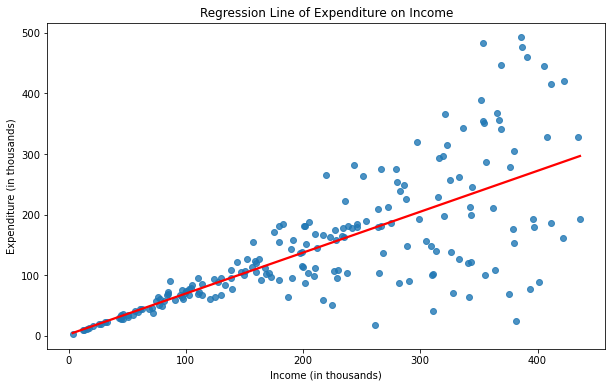

In [7]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='Expenditure', data=data, ci=None, line_kws={"color": "red"})
plt.title('Regression Line of Expenditure on Income')
plt.xlabel('Income (in thousands)')
plt.ylabel('Expenditure (in thousands)')
plt.show()

In [9]:
# Residual analysis
residuals = model.resid

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

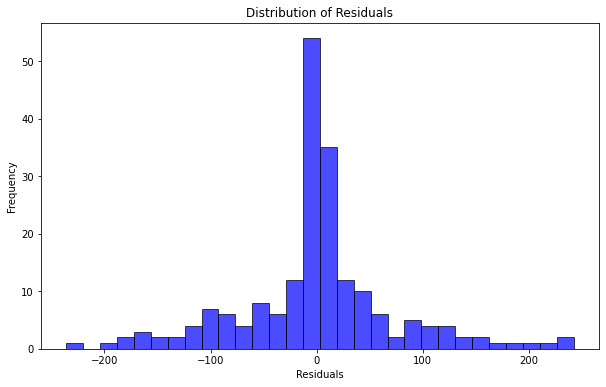

In [14]:
# Convert residuals to a 1D NumPy array if not already
residuals_array = np.asarray(residuals).flatten()

# Plotting residuals using Matplotlib's hist function
plt.figure(figsize=(10, 6))
plt.hist(residuals_array, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Add a Kernel Density Estimate (KDE) line on top if needed
sns.kdeplot(residuals_array, color='red', linewidth=2)

plt.show()


In [15]:

# Check E(u) = 0
mean_residuals = np.mean(residuals)
print(f'Mean of Residuals (E(u)): {mean_residuals}')

# Check Var(u) = 0 (Homoscedasticity)
_, pval, __, f_pval = het_breuschpagan(residuals, model.model.exog)
print(f'P-value for Breusch-Pagan test (Var(u) = 0 assumption): {pval}')

# Check Cov(u_i, u_j) = 0 (Autocorrelation)
dw = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic for autocorrelation (Cov(u_i, u_j) = 0 assumption): {dw}')

Mean of Residuals (E(u)): 2.8848035071860065e-14
P-value for Breusch-Pagan test (Var(u) = 0 assumption): 3.3464863589453733e-16
Durbin-Watson statistic for autocorrelation (Cov(u_i, u_j) = 0 assumption): 2.167365723538409
